<a href="https://colab.research.google.com/github/Mac98M/MachineLearning2024_DrAliyari_KNTUCourse/blob/main/HomeWorks/HW3/Code/masihmokhtari_ml_miniproj3_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Machine Learning Dr.Aliyari_


**Masih Mokhtari**

**40211454**
****
_mini project $3$_

$Q3$

# Import Libraries

In [33]:
# At first we disable all warnings.
import warnings
warnings.filterwarnings("ignore")

# Before we start, we have to import libraries we need.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.manifold import TSNE

from sklearn import datasets
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

import pickle
from scipy import stats
import tensorflow as tf
from pylab import rcParams

from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
import h5py

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1)

rcParams['figure.figsize'] = 8, 5

RANDOM_SEED = 54
LABELS = ["Normal", "Fraud"]


Random_state = 54

# Download Dataset

In [ ]:
!pip install --upgrade --no-cach-dir gdown
! gdown

df = pd.read_csv()

In [3]:
!pip install --upgrade --no-cach-dir gdown
! gdown 1CdNMF_D8enArP5DwmtffkhFbBxtAxC-p
# https://drive.google.com/file/d/1CdNMF_D8enArP5DwmtffkhFbBxtAxC-p/view?usp=sharing


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --no-cach-dir
Downloading...
From (original): https://drive.google.com/uc?id=1CdNMF_D8enArP5DwmtffkhFbBxtAxC-p
From (redirected): https://drive.google.com/uc?id=1CdNMF_D8enArP5DwmtffkhFbBxtAxC-p&confirm=t&uuid=1390eb20-2bec-4dee-95de-45f4d53f35bb
To: /content/creditcard.csv
100% 151M/151M [00:01<00:00, 119MB/s]


# Load Dataset

In [4]:
df = pd.read_csv('creditcard.csv')

In [5]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
# Print some information about the dataframe
df.info()
print("\n")
# Print some statistical information about the dataframe
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
# Checking missing values
missingvalues = df.isnull().sum().sum()
if missingvalues==0 :
  print('This dataset has no missong values')
else:
  print(f'This dataset has {missingvalues} missong values !')


This dataset has no missong values


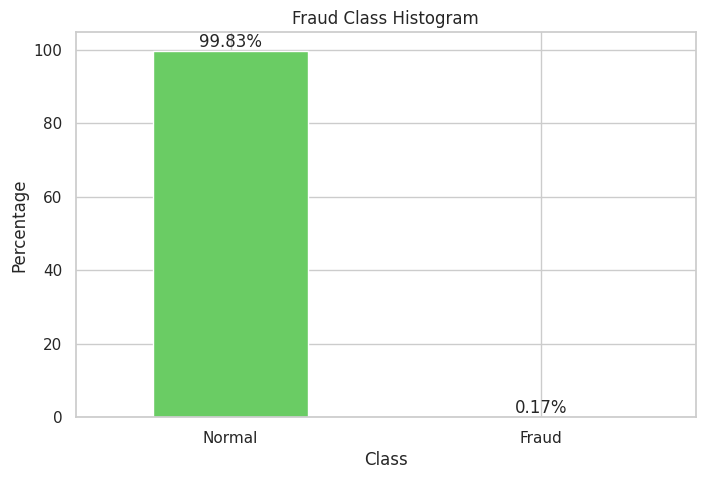

In [25]:
# Assuming df is your DataFrame and LABELS is defined
count_classes = pd.value_counts(df['Class'], sort=True)
percent_classes = count_classes / count_classes.sum() * 100

# Define custom colors for the bars
colors = ['g', 'r']

# Plotting
percent_classes.plot(kind='bar', color=colors, rot=0)
plt.title("Fraud Class Histogram")
plt.xticks(range(len(LABELS)), LABELS)
plt.xlabel("Class")
plt.ylabel("Percentage")

# Add percentage labels on top of the bars
for index, value in enumerate(percent_classes):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

plt.show()

In [27]:
column = 'Class'
num_unique_values = df[column].nunique()
value_counts = df[column].value_counts()
print(f'The number of unique values in the column "{column}" is {num_unique_values}')
print('\n')
print(value_counts)
print('\n')
#y_train.shape
#print(y_train)

frauds = df[df.Class == 1]
normal = df[df.Class == 0]
print(f'Calss Normal shape : {normal.shape}\nCalss Frauds shape : {frauds.shape}')

The number of unique values in the column "Class" is 2


Class
0    284315
1       492
Name: count, dtype: int64


Calss Normal shape : (284315, 31)
Calss Frauds shape : (492, 31)


In [10]:
frauds.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

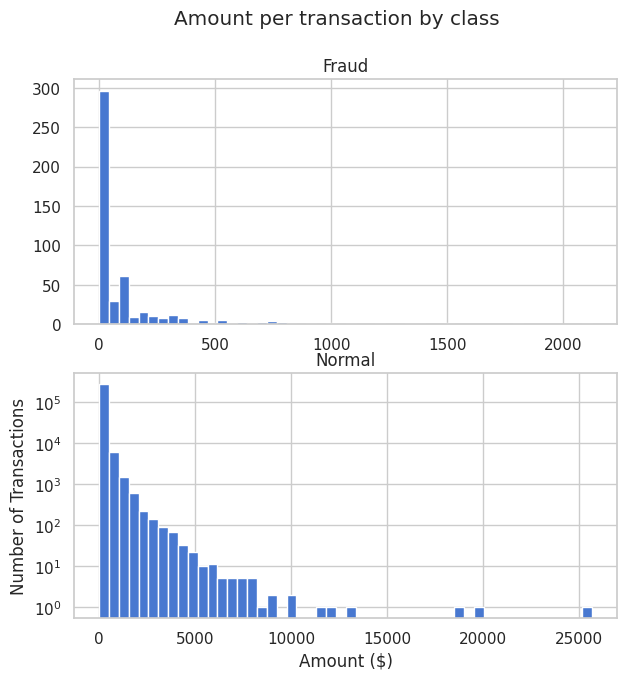

In [12]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=False, figsize = (7,7))
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(frauds.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

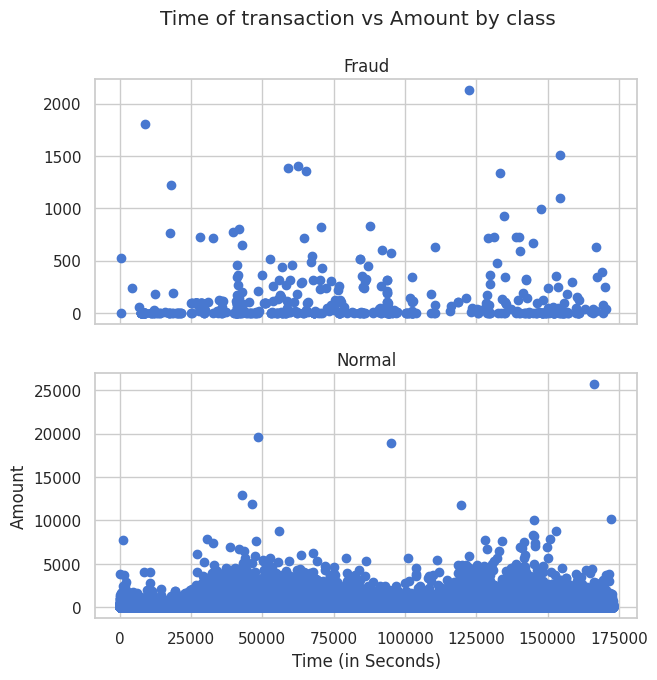

In [13]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize = (7,7))
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

Cvariance Matrix of features is : 

             Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
V2     -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
V3     -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4     -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
V5      0.173072  1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
V6     -0.063016 -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
V7      0.084714 -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
V8     -0.036949 -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
V9     -0.008660 -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
V10     0.030617  7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
V11    -0.247689  2.125498e-16  1.975426e-16  1.576

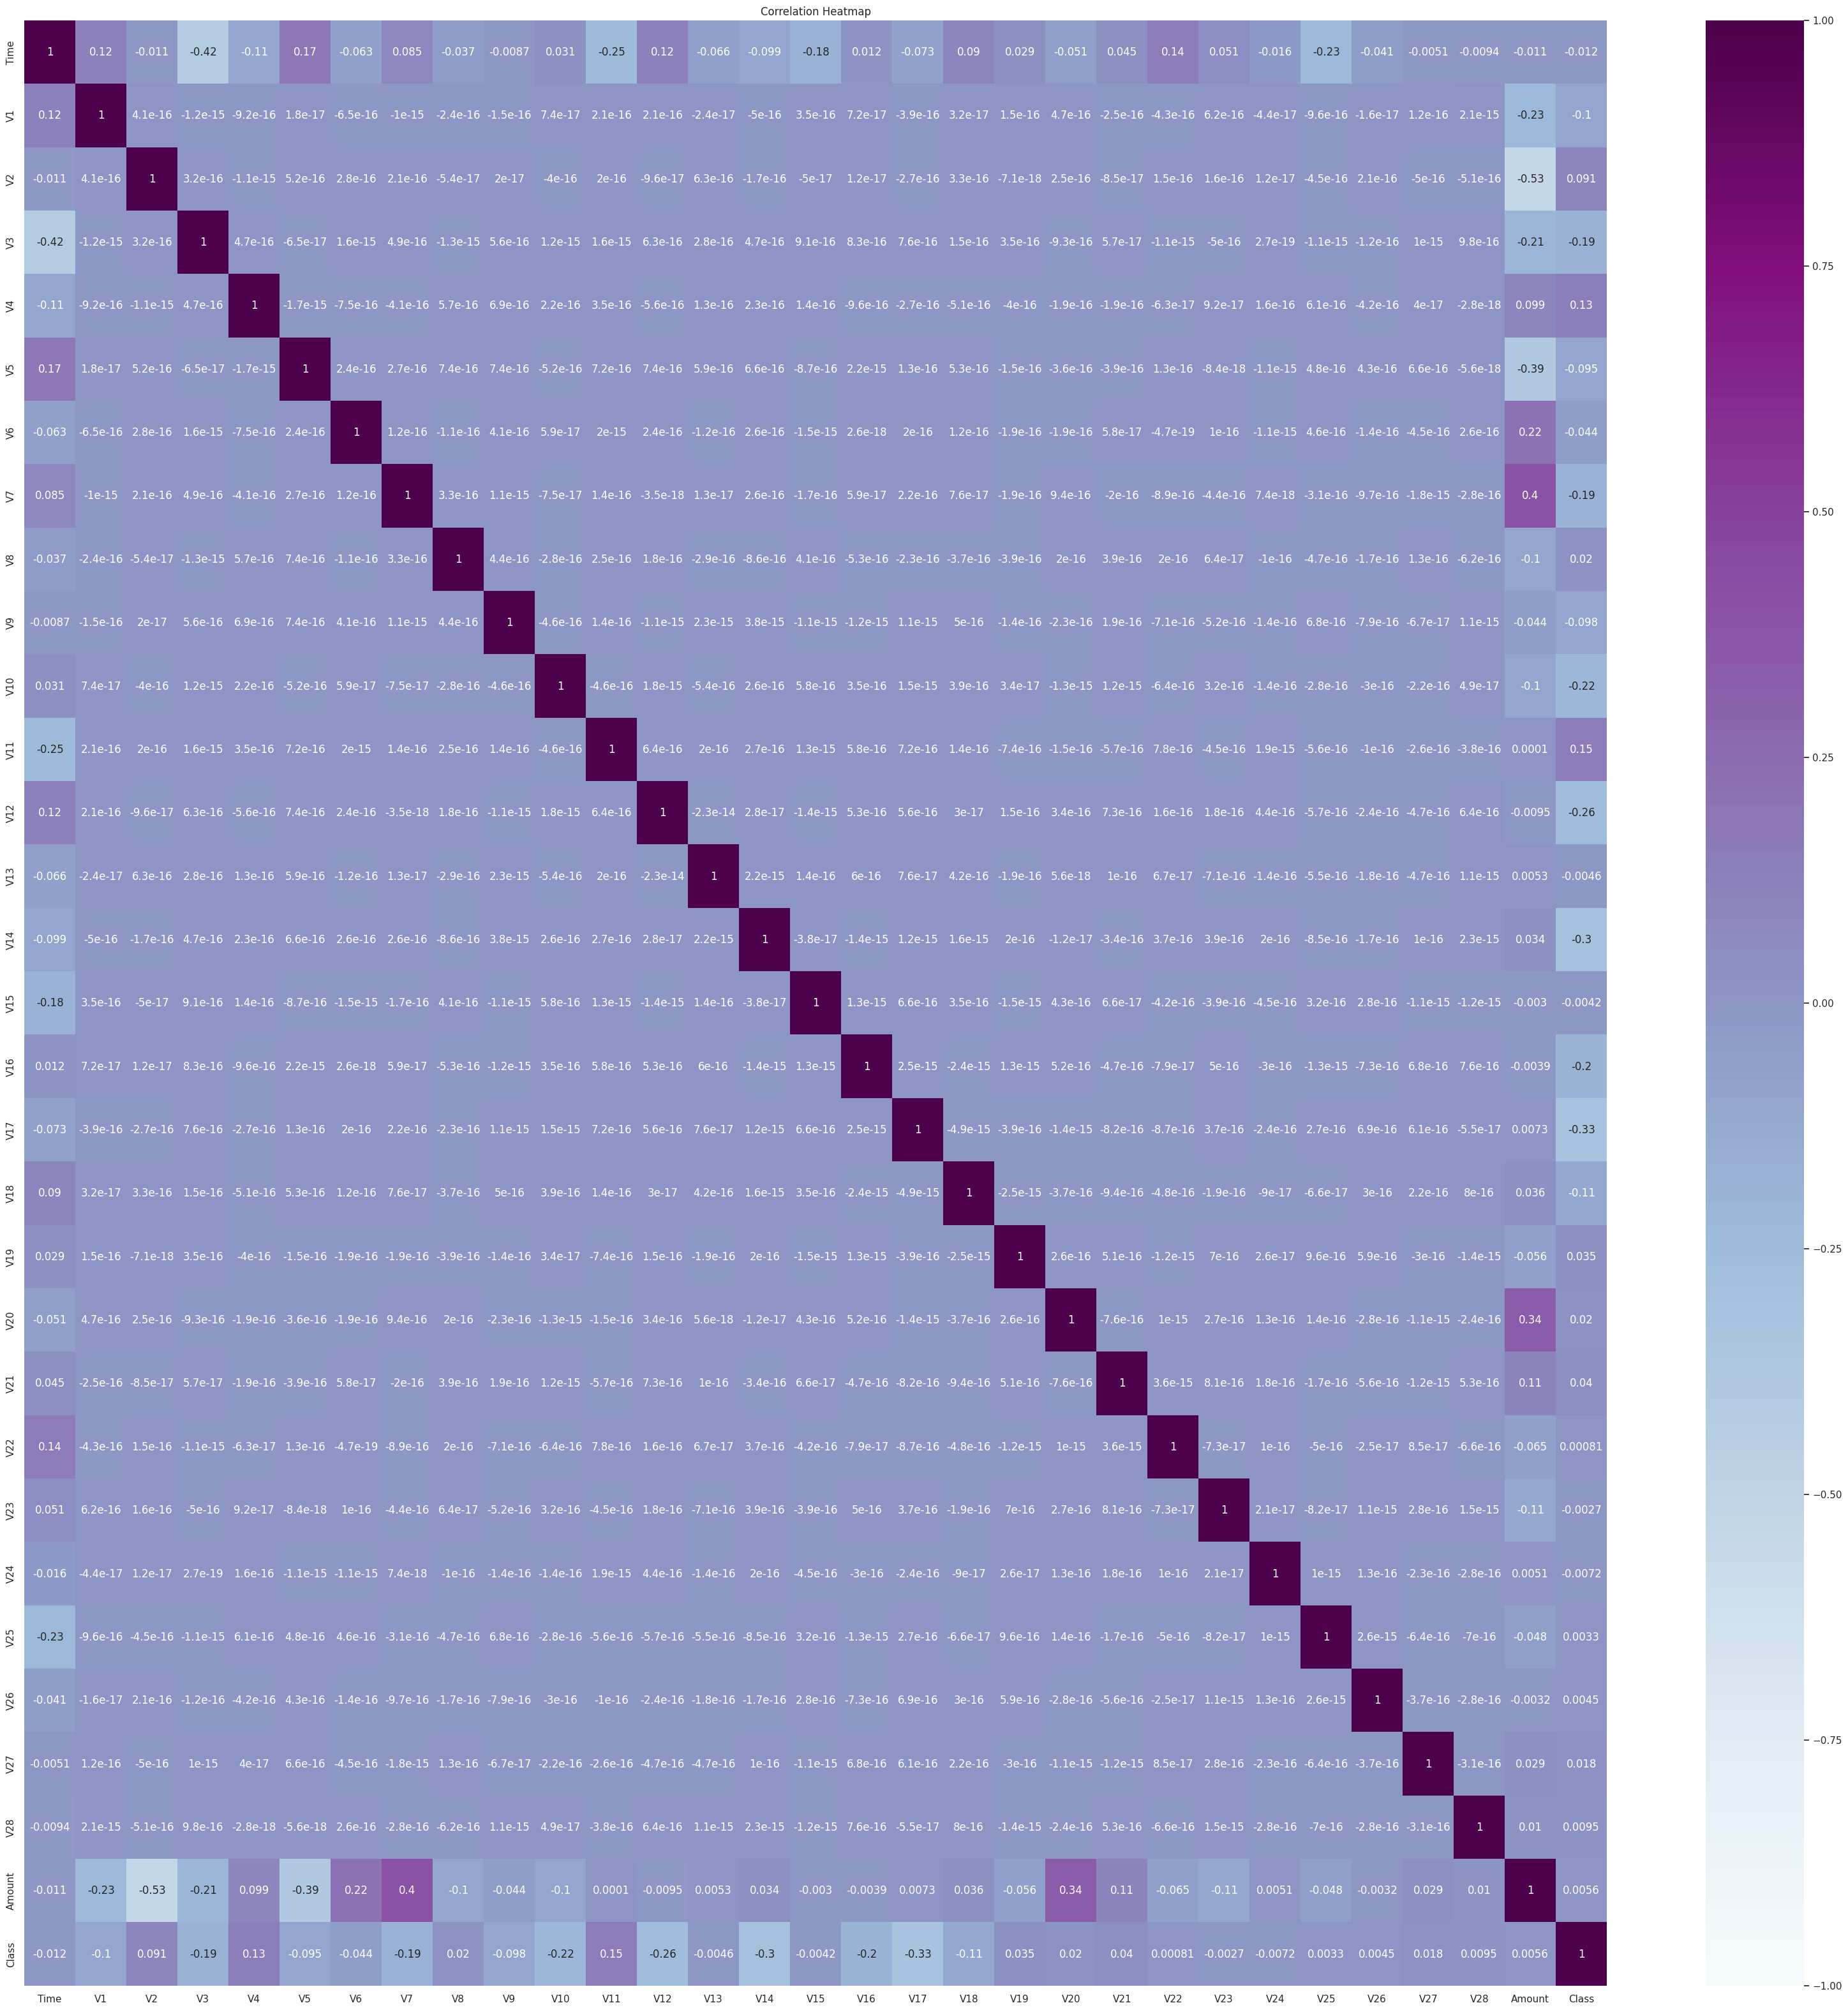

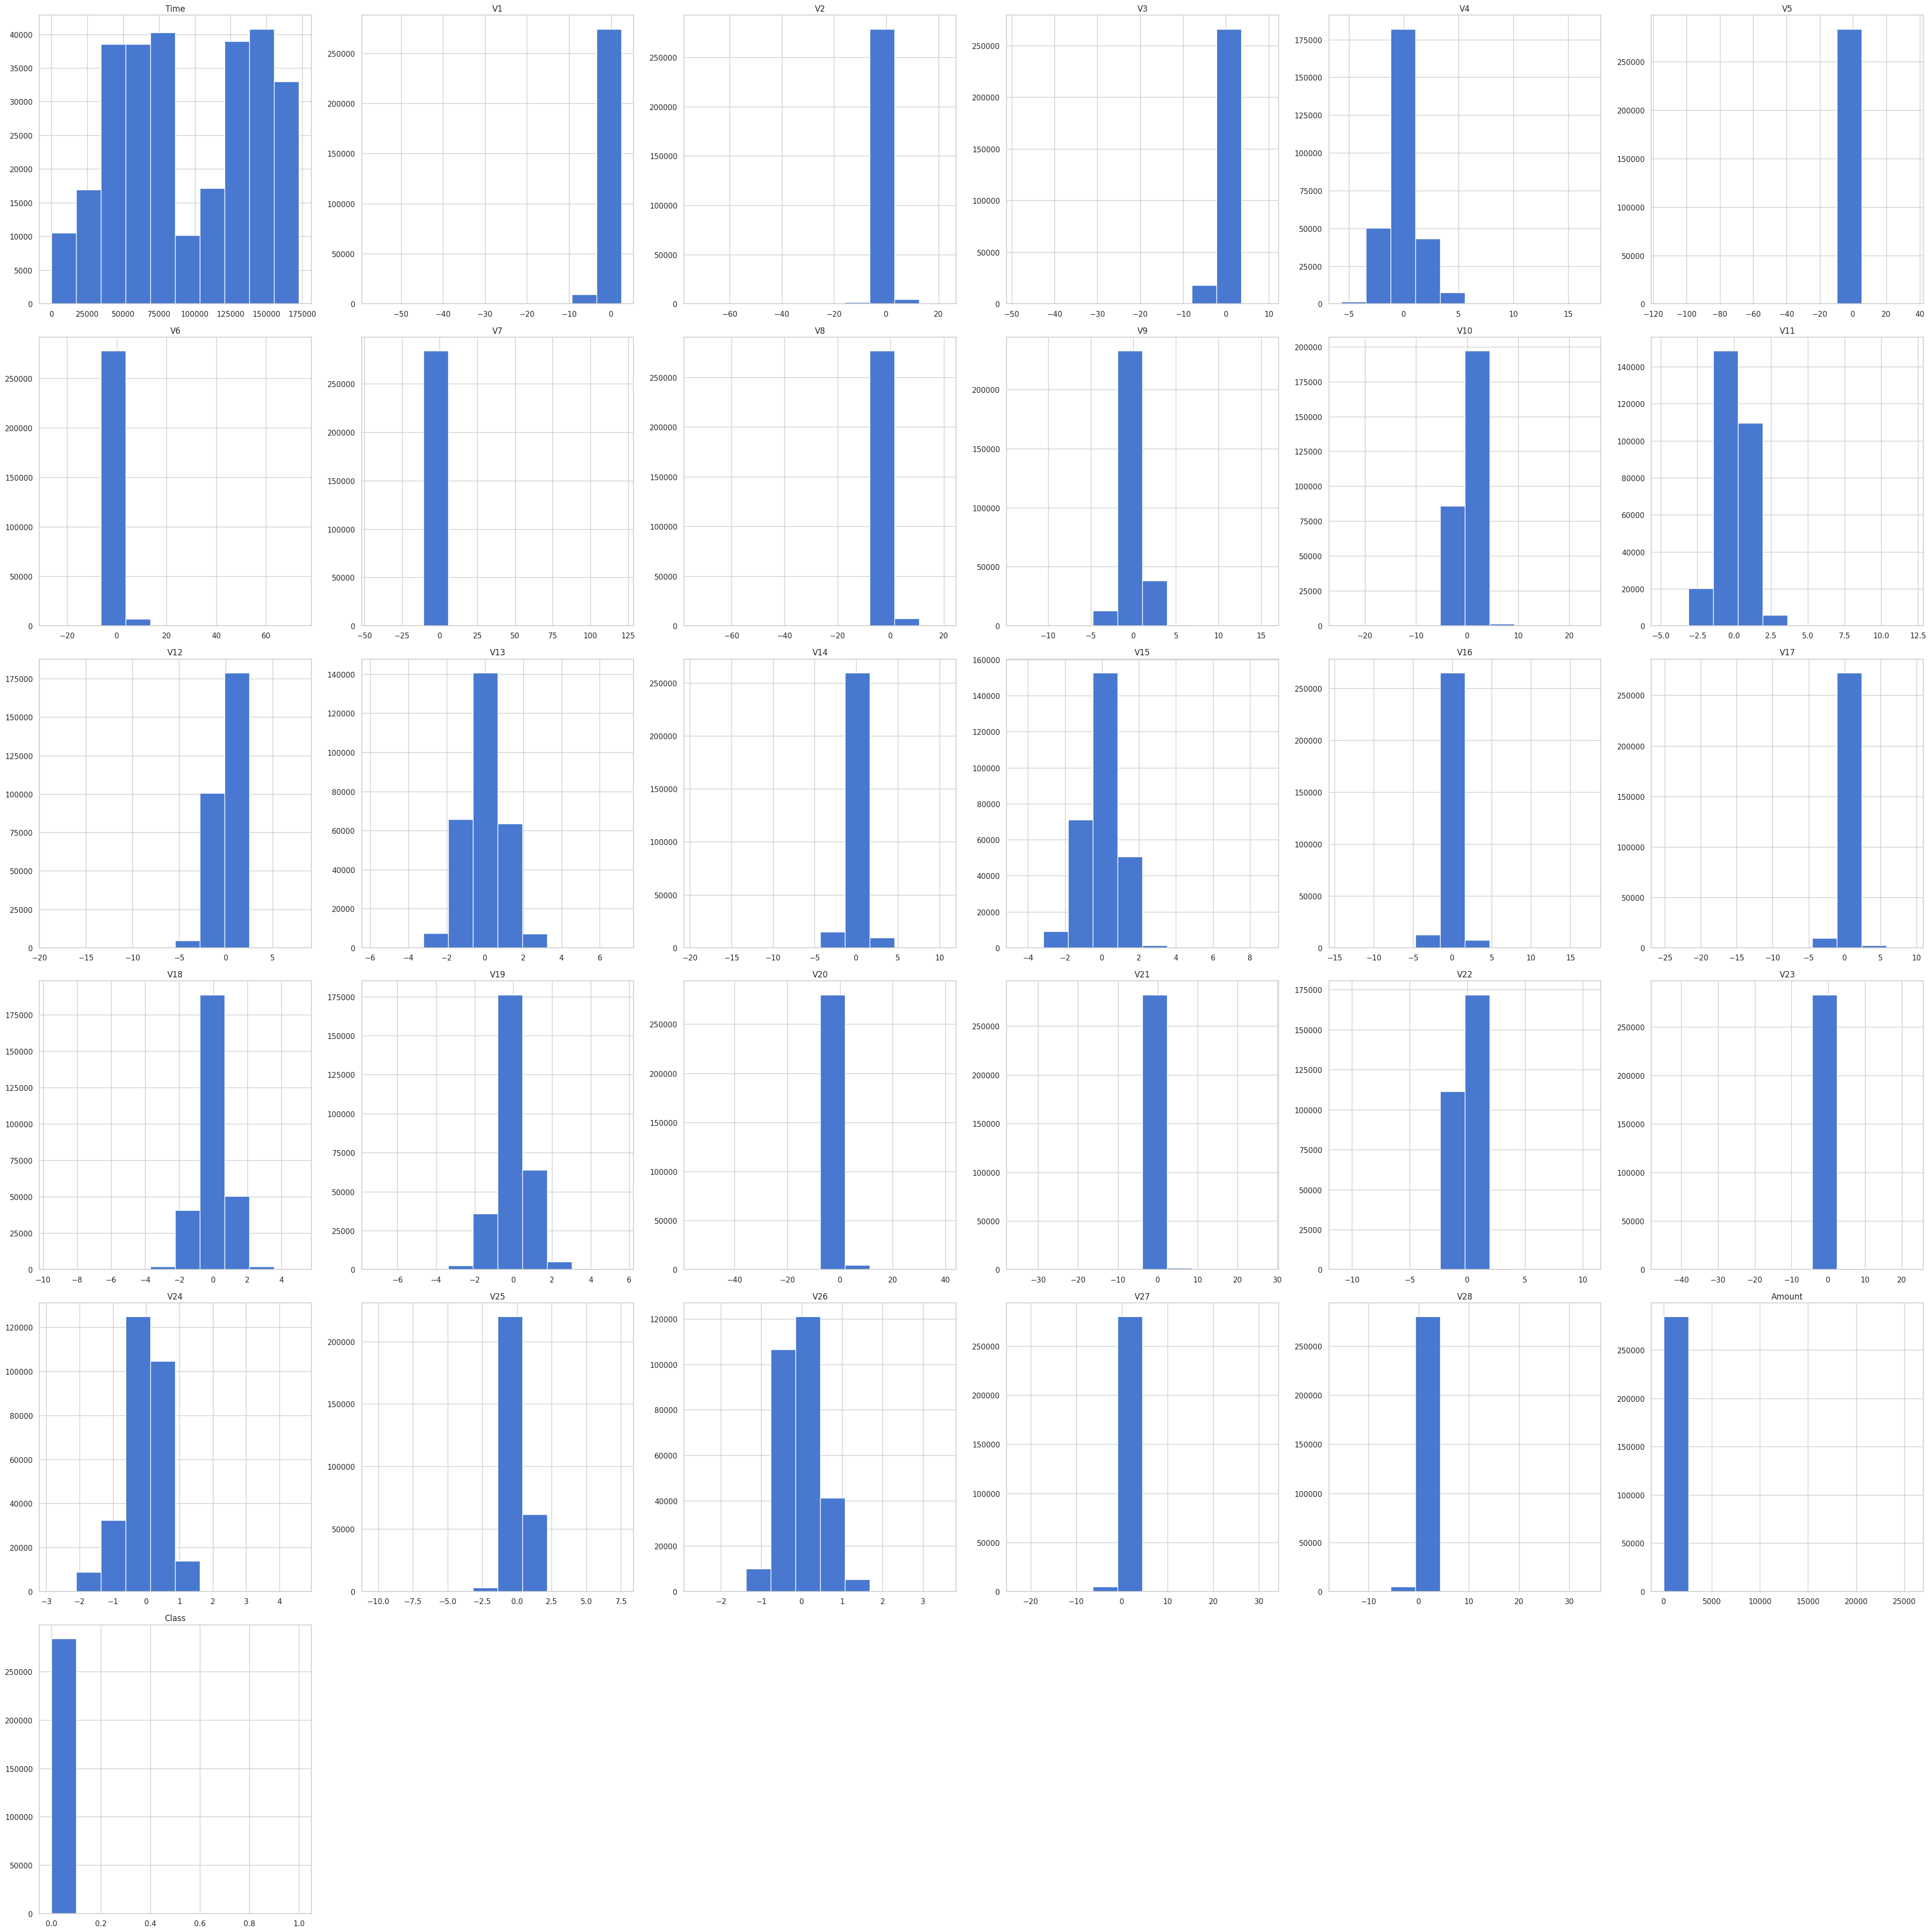

Descriptive Statistics:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+0

In [28]:
dir()
# Calculate and print the correlation matrix
corr = df.corr()

rounded_matrix_1 = np.round(corr, 3)
print(f'Cvariance Matrix of features is : \n\n {corr}\n\n')
print(f'Cvariance Matrix of features is : \n\n {rounded_matrix_1}\n\n')

plt.figure(figsize = (40, 40))
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values, cmap = "BuPu", vmin = -1, vmax = 1, annot = True)
plt.title("Correlation Heatmap")
plt.show()

# Plot histograms for numeric columns
df.hist(figsize=(40, 40))
plt.tight_layout()
plt.show()

# Display descriptive statistics
print("Descriptive Statistics:")
print(df.describe())

# Display the first five rows
print("First Five Rows:")
print(df.head())

# Display general information about the DataFrame
print("DataFrame Info:")
print(df.info())

# Print the column names
print("Column Names:")
print(df.columns)

# Print the shape of the DataFrame
print("DataFrame Shape:")
print(df.shape)

# Pre-Processing

In [29]:
df.drop(['Time'], axis = 1, inplace = True)

sc = StandardScaler()
df['Amount'] = sc.fit_transform(df[['Amount']])

X = df.drop(['Class'], axis = 1)
y = df['Class']
X.shape, y.shape

((284807, 29), (284807,))

In [34]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state= Random_state)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state= Random_state) # 0.25 * 0.8 = 0.2

In [35]:
# Calculate percentages
train_percent = len(X_train) / len(X) * 100
val_percent = len(X_val) / len(X) * 100
test_percent = len(X_test) / len(X) * 100

# Display the shapes and percentages
shapes = {
    "X_train_shape": X_train.shape,
    "X_val_shape": X_val.shape,
    "X_test_shape": X_test.shape,
    "y_train_shape": y_train.shape,
    "y_val_shape": y_val.shape,
    "y_test_shape": y_test.shape
}

percentages = {
    "train_percent": train_percent,
    "val_percent": val_percent,
    "test_percent": test_percent
}
shapes, percentages

({'X_train_shape': (170883, 29),
  'X_val_shape': (56962, 29),
  'X_test_shape': (56962, 29),
  'y_train_shape': (170883,),
  'y_val_shape': (56962,),
  'y_test_shape': (56962,)},
 {'train_percent': 59.99957866204131,
  'val_percent': 20.000210668979342,
  'test_percent': 20.000210668979342})

# SMOTE

In [36]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority', random_state = Random_state)
X_train, y_train = smote.fit_resample(X_train, y_train)

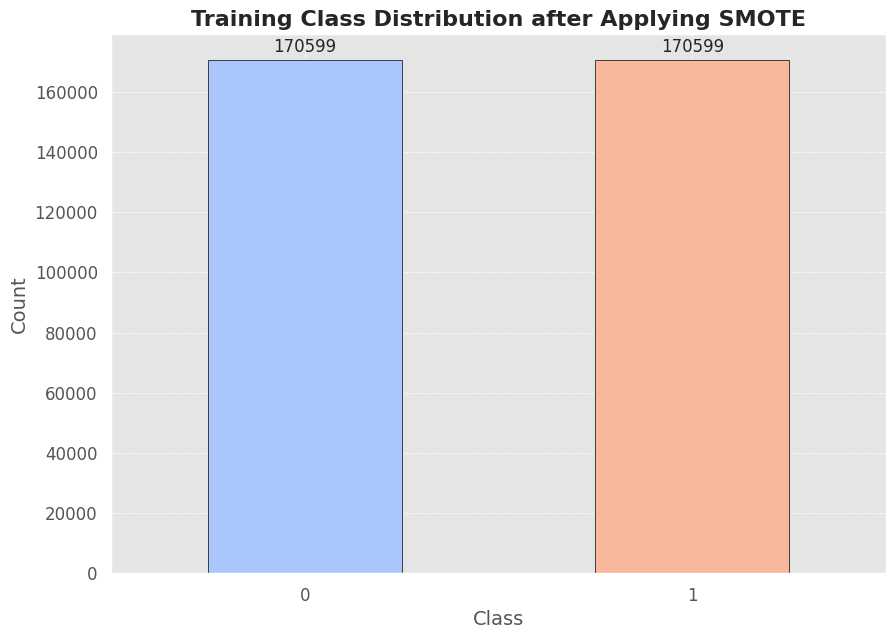

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
class_counts = y_train.value_counts()

# Set the style
plt.style.use('ggplot')

# Create a color palette
colors = sns.color_palette("coolwarm", len(class_counts))

# Plot
plt.figure(figsize=(10, 7))
bar_plot = class_counts.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Training Class Distribution after Applying SMOTE', fontsize=16, fontweight='bold')
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

# Add labels on the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9),
                      textcoords = 'offset points',
                      fontsize=12)

plt.show()

In [39]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Part 3

**Noise and Denoising AutoEncoder**

In [40]:
noise_factor = 0.2
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_val_noisy = X_val + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_val.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

# Build the denoising autoencoder
input_dim = X_train.shape[1]

input_layer = Input(shape=(input_dim,))
encoded = Dense(22, activation='relu')(input_layer)
encoded = Dense(15, activation='relu')(encoded)
encoded = Dense(10, activation='relu')(encoded)
decoded = Dense(15, activation='relu')(encoded)
decoded = Dense(22, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='mse')

# Define checkpoint callback to save the best autoencoder model
autoencoder_checkpoint = ModelCheckpoint('best_autoencoder.h5', monitor='val_loss', save_best_only=True, mode='min')

# Train the autoencoder
autoencoder.fit(X_train_noisy,
                X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_val, X_val),
                callbacks=[autoencoder_checkpoint],
                verbose = 1)

Epoch 1/50
1333/1333 [==============================] - 6s 4ms/step - loss: 14.0408 - val_loss: 0.9507
Epoch 2/50
1333/1333 [==============================] - 8s 6ms/step - loss: 13.9086 - val_loss: 0.9230
Epoch 3/50
1333/1333 [==============================] - 6s 5ms/step - loss: 13.8955 - val_loss: 0.9163
Epoch 4/50
1333/1333 [==============================] - 8s 6ms/step - loss: 13.8897 - val_loss: 0.9086
Epoch 5/50
1333/1333 [==============================] - 4s 3ms/step - loss: 13.8833 - val_loss: 0.8984
Epoch 6/50
1333/1333 [==============================] - 5s 3ms/step - loss: 13.8725 - val_loss: 0.8774
Epoch 7/50
1333/1333 [==============================] - 6s 4ms/step - loss: 13.8633 - val_loss: 0.8661
Epoch 8/50
1333/1333 [==============================] - 4s 3ms/step - loss: 13.8572 - val_loss: 0.8584
Epoch 9/50
1333/1333 [==============================] - 4s 3ms/step - loss: 13.8543 - val_loss: 0.8549
Epoch 10/50
1333/1333 [==============================] - 5s 4ms/step - lo

In [42]:
# Load the best autoencoder model
autoencoder.load_weights('best_autoencoder.h5')
# Denoise the training, validation, and test sets
X_train_denoised = autoencoder.predict(X_train_noisy)
X_val_denoised = autoencoder.predict(X_val_noisy)
X_test_denoised = autoencoder.predict(X_test_noisy)

1781/1781 [==============================] - 4s 2ms/step


In [43]:
X_train_denoised.shape, y_train.shape, y_val.shape

((341198, 29), (341198, 2), (56962, 2))

In [44]:
# Build the classification model
classifier_input = Input(shape=(input_dim,))
x = Dense(22, activation='relu')(classifier_input)
x = Dense(15, activation='relu')(x)
x = Dense(10, activation='relu')(x)
x = Dense(5, activation='relu')(x)
x = Dense(2, activation='softmax')(x)

classifier = Model(classifier_input, x)
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define checkpoint callback to save the best classifier model
classifier_checkpoint = ModelCheckpoint('best_classifier.h5', monitor='val_loss', save_best_only=True, mode='min')

# Train the classifier
classifier.fit(X_train_denoised,
               y_train,
               epochs=50,
               batch_size=256,
               shuffle = True,
               validation_data=(X_val_denoised, y_val),
               callbacks=[classifier_checkpoint],
               verbose = 1)

Epoch 1/50
1333/1333 [==============================] - 5s 3ms/step - loss: 0.2345 - accuracy: 0.9375 - val_loss: 0.1685 - val_accuracy: 0.9775
Epoch 2/50
1333/1333 [==============================] - 8s 6ms/step - loss: 0.1165 - accuracy: 0.9672 - val_loss: 0.1075 - val_accuracy: 0.9759
Epoch 3/50
1333/1333 [==============================] - 5s 4ms/step - loss: 0.0836 - accuracy: 0.9735 - val_loss: 0.0757 - val_accuracy: 0.9786
Epoch 4/50
1333/1333 [==============================] - 5s 4ms/step - loss: 0.0703 - accuracy: 0.9766 - val_loss: 0.0639 - val_accuracy: 0.9804
Epoch 5/50
1333/1333 [==============================] - 6s 5ms/step - loss: 0.0629 - accuracy: 0.9783 - val_loss: 0.0537 - val_accuracy: 0.9838
Epoch 6/50
1333/1333 [==============================] - 6s 4ms/step - loss: 0.0554 - accuracy: 0.9799 - val_loss: 0.0664 - val_accuracy: 0.9768
Epoch 7/50
1333/1333 [==============================] - 10s 7ms/step - loss: 0.0521 - accuracy: 0.9810 - val_loss: 0.0414 - val_accuracy

# Part 4

1781/1781 [==============================] - 3s 2ms/step
Validation Set Metrics:
Accuracy   : 99.08%
F1 Score   : 0.99
Recall     : 0.99
Precision  : 1.00


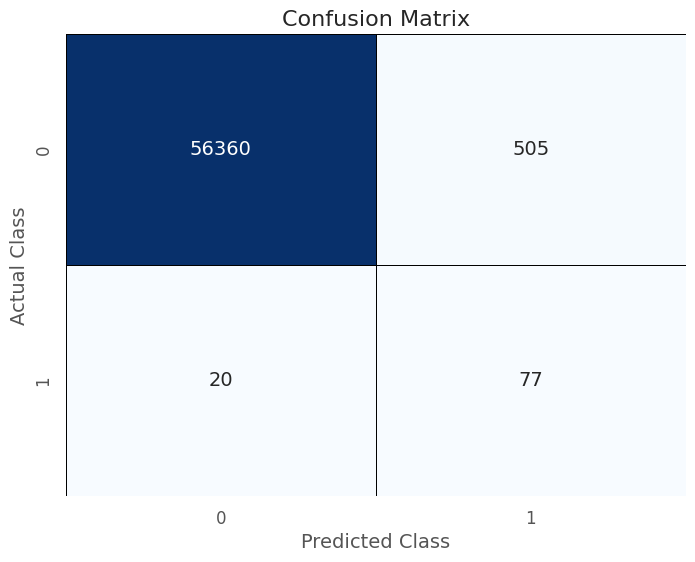

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
import numpy as np

# Load the best classifier model
classifier.load_weights('best_classifier.h5')

# Predict on the denoised validation set
y_val_pred = classifier.predict(X_val_denoised)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)

# Calculate metrics for the validation set
conf_matrix = confusion_matrix(y_val_true_classes, y_val_pred_classes)
accuracy = accuracy_score(y_val_true_classes, y_val_pred_classes)
f1 = f1_score(y_val_true_classes, y_val_pred_classes, average='weighted')
recall = recall_score(y_val_true_classes, y_val_pred_classes, average='weighted')
precision = precision_score(y_val_true_classes, y_val_pred_classes, average='weighted')

# Print metrics
print(f'Validation Set Metrics:')
print(f'Accuracy   : {accuracy * 100:.2f}%')
print(f'F1 Score   : {f1:.2f}')
print(f'Recall     : {recall:.2f}')
print(f'Precision  : {precision:.2f}')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 14}, linewidths=.5, linecolor='black')
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Class', fontsize=14)
plt.ylabel('Actual Class', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

1781/1781 [==============================] - 3s 2ms/step
Accuracy: 99.05%
Precision: 1.00
Recall: 0.99
F1 Score: 0.99
Validation Set Metrics:
Accuracy   : 99.05%
F1 Score   : 0.99
Recall     : 0.99
Precision  : 1.00


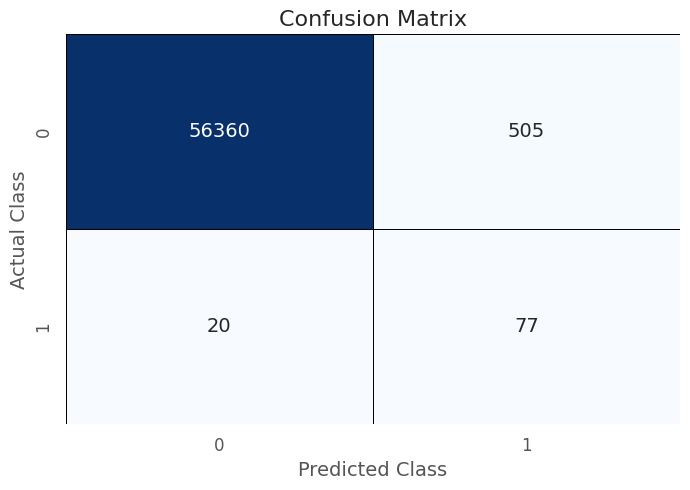

In [46]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the best classifier model
classifier.load_weights('best_classifier.h5')

# Predict on the denoised test set
y_test_pred = classifier.predict(X_test_denoised)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_test_true_classes, y_test_pred_classes)
precision, recall, f1, _ = precision_recall_fscore_support(y_test_true_classes, y_test_pred_classes, average='weighted')

# Print metrics
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Print metrics
print(f'Validation Set Metrics:')
print(f'Accuracy   : {accuracy * 100:.2f}%')
print(f'F1 Score   : {f1:.2f}')
print(f'Recall     : {recall:.2f}')
print(f'Precision  : {precision:.2f}')

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 14}, linewidths=.5, linecolor='black')
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Class', fontsize=14)
plt.ylabel('Actual Class', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [47]:
print(classification_report(y_test_true_classes, y_test_pred_classes))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56851
           1       0.15      0.84      0.26       111

    accuracy                           0.99     56962
   macro avg       0.58      0.91      0.63     56962
weighted avg       1.00      0.99      0.99     56962



# Part 5

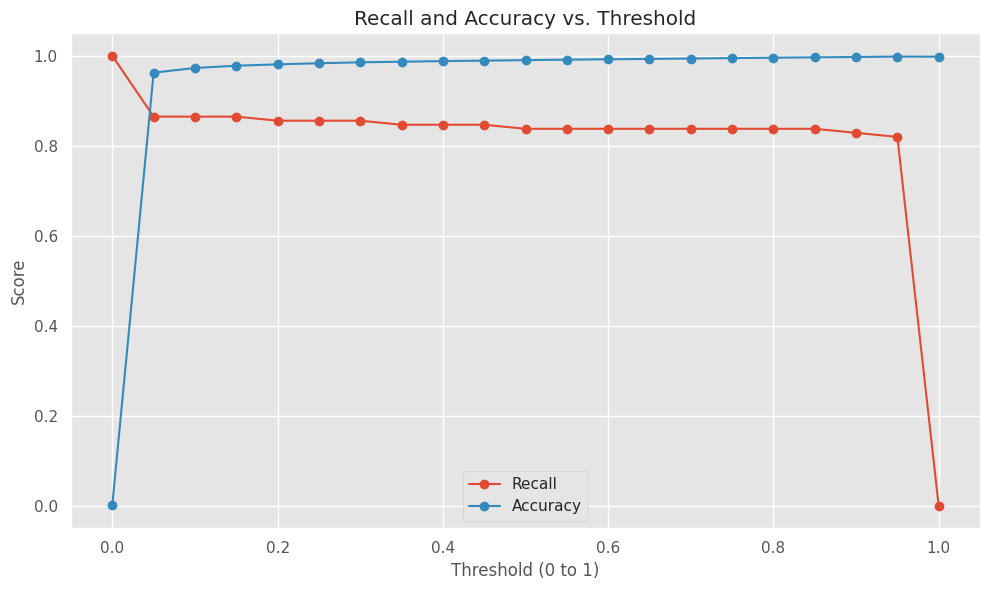

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, accuracy_score

# Generate thresholds from 0 to 1 with step 0.05
thresholds = np.arange(0.0, 1.05, 0.05)

# Initialize lists to store recall and accuracy values
recalls = []
accuracies = []

# Calculate recall and accuracy for each threshold
for threshold in thresholds:
    # Predict classes based on the threshold
    y_pred = (y_test_pred[:, 1] >= threshold).astype(int)

    # Calculate recall and accuracy
    recall = recall_score(np.argmax(y_test, axis=1), y_pred)
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)

    # Append to lists
    recalls.append(recall)
    accuracies.append(accuracy)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls, label='Recall', marker='o')
plt.plot(thresholds, accuracies, label='Accuracy', marker='o')
plt.xlabel('Threshold (0 to 1)')
plt.ylabel('Score')
plt.title('Recall and Accuracy vs. Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

Resampled dataset shape with strategy 0.1: (187665, 29) (187665, 2)
Epoch 1/20
734/734 [==============================] - 4s 4ms/step - loss: 3.4646 - val_loss: 1.0698
Epoch 2/20
734/734 [==============================] - 3s 4ms/step - loss: 3.4186 - val_loss: 1.0683
Epoch 3/20
734/734 [==============================] - 4s 6ms/step - loss: 3.4057 - val_loss: 1.0418
Epoch 4/20
734/734 [==============================] - 3s 4ms/step - loss: 3.3905 - val_loss: 1.0381
Epoch 5/20
734/734 [==============================] - 3s 4ms/step - loss: 3.3883 - val_loss: 1.0365
Epoch 6/20
734/734 [==============================] - 3s 4ms/step - loss: 3.3865 - val_loss: 1.0339
Epoch 7/20
734/734 [==============================] - 4s 6ms/step - loss: 3.3699 - val_loss: 0.9881
Epoch 8/20
734/734 [==============================] - 5s 6ms/step - loss: 3.3372 - val_loss: 0.9767
Epoch 9/20
734/734 [==============================] - 4s 6ms/step - loss: 3.3263 - val_loss: 0.9654
Epoch 10/20
734/734 [===========

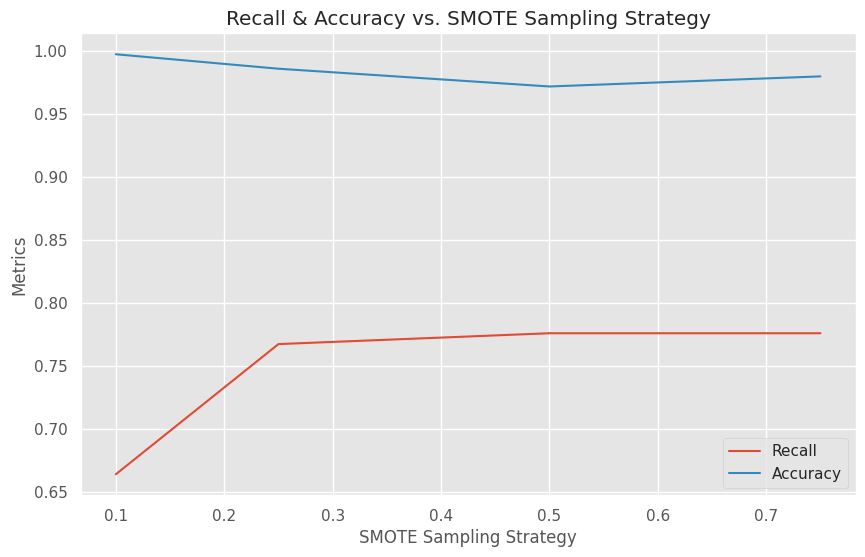

In [50]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=24) # 0.25 * 0.8 = 0.2

y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

sampling_strategies = [0.1, 0.25, 0.5, 0.75]

results = []

for strategy in sampling_strategies:
    # Apply SMOTE with the current sampling strategy
    smote = SMOTE(sampling_strategy=strategy, random_state=24)
    X_train_res, y_train_res = smote.fit_resample(X_train, np.argmax(y_train, axis=1))
    y_train_res = to_categorical(y_train_res, num_classes=2)

    print(f'Resampled dataset shape with strategy {strategy}:', X_train_res.shape, y_train_res.shape)

    # Adding Gaussian noise to the data
    def add_noise(data, noise_factor=0.2):
        noisy_data = data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data.shape)
        noisy_data = np.clip(noisy_data, 0., 1.)
        return noisy_data

    X_train_noisy = add_noise(X_train_res)
    X_val_noisy = add_noise(X_val)

    # Define the autoencoder model
    input_dim = X_train_res.shape[1]
    encoding_dim = 10

    input_layer = Input(shape=(input_dim,))
    encoder = Dense(encoding_dim, activation="relu")(input_layer)
    encoder = Dense(22, activation="relu")(encoder)
    encoder = Dense(15, activation="relu")(encoder)
    encoder = Dense(encoding_dim, activation="relu")(encoder)
    encoder = Dense(15, activation="relu")(encoder)
    encoder = Dense(22, activation="relu")(encoder)
    decoder = Dense(input_dim, activation='sigmoid')(encoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')

    # Train the autoencoder
    autoencoder.fit(X_train_noisy, X_train_res,
                    epochs=20,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(X_val_noisy, X_val),
                    verbose=1)

    # Denoise the data
    X_train_denoised = autoencoder.predict(X_train_noisy)
    X_valid_denoised = autoencoder.predict(X_val_noisy)

    # Define the classifier model
    classifier_input = Input(shape=(input_dim,))
    classifier_layer = Dense(encoding_dim, activation="relu")(classifier_input)
    classifier_layer = Dense(22, activation="relu")(classifier_layer)
    classifier_layer = Dense(15, activation="relu")(classifier_layer)
    classifier_layer = Dense(10, activation="relu")(classifier_layer)
    classifier_layer = Dense(5, activation="relu")(classifier_layer)
    classifier_layer = Dense(2, activation='softmax')(classifier_layer)  # Two neurons with softmax activation

    classifier = Model(inputs=classifier_input, outputs=classifier_layer)
    classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Categorical crossentropy loss

    # Train the classifier
    classifier.fit(X_train_denoised, y_train_res,
                   epochs=20,
                   batch_size=256,
                   shuffle=True,
                   validation_data=(X_val_denoised, y_val),
                   verbose=1)

    # Evaluate the classifier on the test set
    X_test_noisy = add_noise(X_test)
    X_test_denoised = autoencoder.predict(X_test_noisy)

    # Predict probabilities
    y_pred_prob = classifier.predict(X_test_denoised)

    # Define a fixed threshold for classification
    threshold = 0.5
    y_pred = (y_pred_prob[:, 1] >= threshold).astype(int)

    # Calculate recall and accuracy
    recall = recall_score(np.argmax(y_test, axis=1), y_pred)
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    results.append({'SMOTE Threshold': strategy, 'Recall Rate': recall, 'Accuracy': accuracy})

# Create a DataFrame for the results
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Plot recall and accuracy against SMOTE sampling strategies
plt.figure(figsize=(10, 6))
plt.plot(results_df['SMOTE Threshold'], results_df['Recall Rate'], label='Recall')
plt.plot(results_df['SMOTE Threshold'], results_df['Accuracy'], label='Accuracy')
plt.xlabel('SMOTE Sampling Strategy')
plt.ylabel('Metrics')
plt.title('Recall & Accuracy vs. SMOTE Sampling Strategy')
plt.legend()
plt.show()

# Part 6

Epoch 1/20
668/668 [==============================] - 14s 13ms/step - loss: 0.0648 - accuracy: 0.9904 - val_loss: 0.0106 - val_accuracy: 0.9983
Epoch 2/20
668/668 [==============================] - 3s 4ms/step - loss: 0.0064 - accuracy: 0.9984 - val_loss: 0.0047 - val_accuracy: 0.9987
Epoch 3/20
668/668 [==============================] - 3s 4ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0039 - val_accuracy: 0.9993
Epoch 4/20
668/668 [==============================] - 3s 4ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 5/20
668/668 [==============================] - 3s 4ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0036 - val_accuracy: 0.9993
Epoch 6/20
668/668 [==============================] - 4s 6ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0035 - val_accuracy: 0.9993
Epoch 7/20
668/668 [==============================] - 3s 4ms/step - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoc

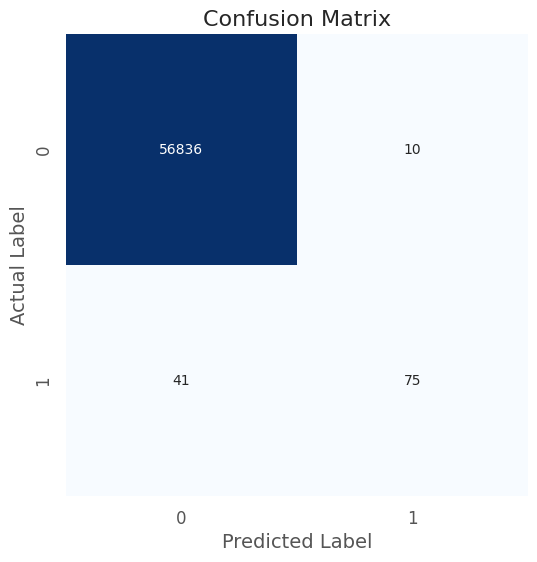

In [52]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Drop 'TIME' and normalize 'AMOUNT'
df = df.drop(columns=['Time'])
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

# Split features and target
X = df.drop(columns=['Class'])
y = df['Class']

# Split into train, validation, and test sets (60%, 20%, 20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=24)  # 0.25 * 0.8 = 0.2

# Convert labels to categorical format
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Add Gaussian noise to the data
def add_noise(data, noise_factor=0.2):
    noisy_data = data + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data.shape)
    noisy_data = np.clip(noisy_data, 0., 1.)
    return noisy_data

X_train_noisy = add_noise(X_train)
X_val_noisy = add_noise(X_val)
X_test_noisy = add_noise(X_test)

# Define the classifier model
input_dim = X_train.shape[1]
classifier_input = Input(shape=(input_dim,))
classifier_layer = Dense(22, activation="relu")(classifier_input)
classifier_layer = Dense(15, activation="relu")(classifier_layer)
classifier_layer = Dense(10, activation="relu")(classifier_layer)
classifier_layer = Dense(5, activation="relu")(classifier_layer)
classifier_layer = Dense(2, activation='softmax')(classifier_layer)

classifier = Model(inputs=classifier_input, outputs=classifier_layer)
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the classifier
classifier.fit(X_train_noisy, y_train,
               epochs=20,
               batch_size=256,
               shuffle=True,
               validation_data=(X_val_noisy, y_val),
               verbose=1)

# Predict probabilities on the test set
y_pred_prob = classifier.predict(X_test_noisy)

# Define a fixed threshold for classification
threshold = 0.5
y_pred = (y_pred_prob[:, 1] >= threshold).astype(int)

# Calculate recall, accuracy, F1 score, precision, and confusion matrix
recall = recall_score(np.argmax(y_test, axis=1), y_pred)
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
f1 = f1_score(np.argmax(y_test, axis=1), y_pred)
precision = precision_score(np.argmax(y_test, axis=1), y_pred)
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Print metrics
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'F1 Score: {f1:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')
print(classification_report(np.argmax(y_test, axis=1), y_pred))

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming conf_matrix is your confusion matrix variable
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('Actual Label', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

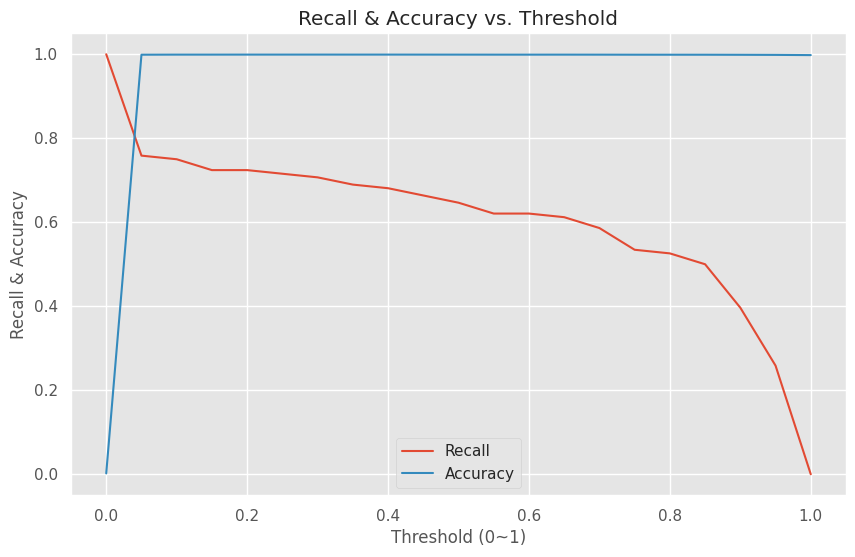

In [53]:
# Sweep the threshold and calculate recall and accuracy
thresholds = np.arange(0.0, 1.05, 0.05)
recalls = []
accuracies = []

for threshold in thresholds:
    y_pred = (y_pred_prob[:, 1] >= threshold).astype(int)
    recall = recall_score(np.argmax(y_test, axis=1), y_pred)
    accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
    recalls.append(recall)
    accuracies.append(accuracy)

# Plot recall and accuracy against thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, accuracies, label='Accuracy')
plt.xlabel('Threshold (0~1)')
plt.ylabel('Recall & Accuracy')
plt.title('Recall & Accuracy vs. Threshold')
plt.legend()
plt.show()